In [1]:
import numpy as np
import matplotlib.pyplot as plt

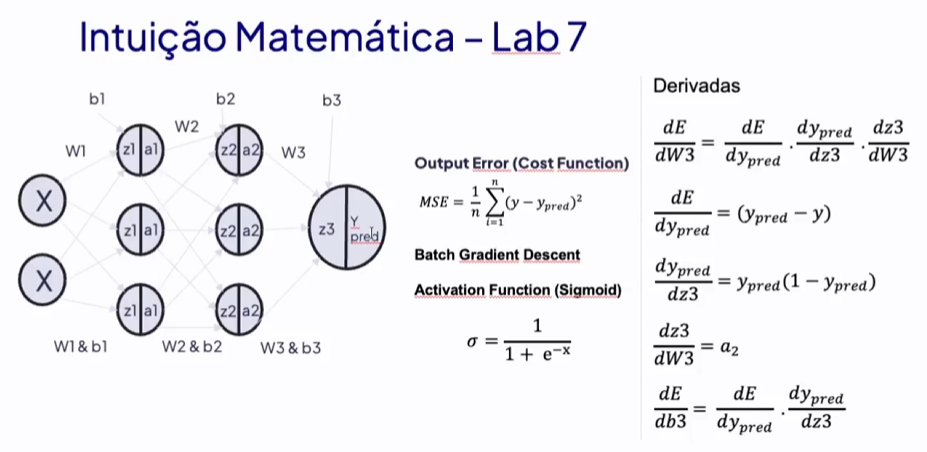

In [14]:
class MLP:
    def __init__(self,learning_rate = 0.1):
        self.learning_rate = learning_rate

        # Inicialização dos pesos e bias para cada camada
        # Camada 1: Entrada (2) -> oculta (3)
        self.W1 = np.random.normal(0,0.5, (2,3))
        self.b1 = np.random.normal(0, 0.5, (1,3))

        # Camada 2: oculta (3) -> oculta (3)
        self.W2 = np.random.normal(0,0.5, (3,3))
        self.b2 = np.random.normal(0,0.5, (1,3))

        # Camada 2: oculta (3) -> saída (1)
        self.W3 = np.random.normal(0,0.5, (3,1))
        self.b3 = np.random.normal(0,0.5, (1,1))

        self.erros = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):

        return x * (1 - x)
    
    def forward(self, X):

        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.z2,self.W3) + self.b3
        self.y_pred = self.sigmoid(self.z3)

        return self.y_pred
    
    def backward(self, X, y):
        # Calculando o erro da saída
        output_error = self.y_pred - y

        # Gradientes para a camada 3 (saída)
        delta_output = output_error * self.sigmoid_derivative(self.y_pred)
        # Atualização dos pesos e bias da camada 3
        self.dW3 = np.dot(self.a2.T, delta_output)
        self.db3 = np.sum(delta_output, axis=0,keepdims=True)

        # Calculo do erro para a camada 2
        error_layer2 = np.dot(delta_output, self.W3.T)
        delta_layer2 = error_layer2 * self.sigmoid_derivative(self.a2)
        # Atualização dos pesos e bias da camada 2
        self.dW2 = np.dot(self.a1.T, delta_layer2)
        self.db2 = np.sum(delta_layer2, axis=0,keepdims=True)

        # Cálculo do erro para a camada 1
        error_layer1 = np.dot(delta_layer2, self.W2.T)
        delta_layer1 = error_layer1 * self.sigmoid_derivative(self.a1)
        # Atualização dos pesos e bias da camada 1
        self.dW1 = np.dot(X.T, delta_layer1)
        self.db1 = np.sum(delta_layer1, axis=0,keepdims=True)

        # Atualização dos pesos e bias usando o gradiente descendente
        self.W3 -= self.learning_rate * self.dW3
        self.b3 -= self.learning_rate * self.db3

        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2

        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1

    def train(self, X, y, epochs=1000):
        print("Iniciando o treinamento...")
        for epoch in range(epochs):

            y_pred = self.forward(X)

            self.backward(X, y)

            error = np.mean((y_pred - y) ** 2)

            self.erros.append(error)

            if (epoch + 1) % 100 == 0:
                print(f"Época : {epoch + 1}: Erro = {error:.6f} ")
        
        print("\n Treinamento concluído!")
        print(f"Error Final: {self.erros[-1]:.6f}")
    
    def predict(self, X):
        return self.forward(X) 

def main():

    X_xor = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]
    ])

    y_xor = np.array([
        [0],
        [1],
        [1],
        [0]
    ])

    print("Problema XOR - MLP com arquitetura 2-3-3-1")

    learning_rate = 0.1
    epochs = 10000
    print("Configuração do modelo")
    print(f"Learning Rate: {learning_rate}")
    print(f"Número de épocas {epochs}\n")

    mlp = MLP(learning_rate)

    mlp.train(X_xor,y_xor,epochs)

    predictions = mlp.predict(X_xor)

    for i in range(len(X_xor)):
        input_data = X_xor[i]
        expected = y_xor[i][0]
        predicted = predictions[i][0]

        print(f"({input_data[0]}, {input_data[1]}) -> {expected} -> {predicted:.4f}")
    
    print(f"\nErro médio quadrático (MSE): {mlp.erros[-1]:.6f}")

    plt.figure(figsize=(10,6))
    plt.plot(mlp.erros)
    plt.title("Histórico de erro durante o treinamento")
    plt.xlabel("Época")
    plt.ylabel("Erro (MSE)")
    plt.grid(True)
    plt.show()

    mse_threshold = 0.01

    if mlp.erros[-1] < mse_threshold:
        print("Treinamento concluído com sucesso!")
    else:
        print("Treinamento pode não ter convergido com sucesso!")
        print(f"Erro final: {mlp.erros[-1]:.6f}")



Problema XOR - MLP com arquitetura 2-3-3-1
Configuração do modelo
Learning Rate: 0.1
Número de épocas 10000

Iniciando o treinamento...
Época : 100: Erro = 0.249630 
Época : 200: Erro = 0.249575 
Época : 300: Erro = 0.249525 
Época : 400: Erro = 0.249474 
Época : 500: Erro = 0.249424 
Época : 600: Erro = 0.249373 
Época : 700: Erro = 0.249321 
Época : 800: Erro = 0.249269 
Época : 900: Erro = 0.249216 
Época : 1000: Erro = 0.249161 
Época : 1100: Erro = 0.249106 
Época : 1200: Erro = 0.249049 
Época : 1300: Erro = 0.248991 
Época : 1400: Erro = 0.248931 
Época : 1500: Erro = 0.248868 
Época : 1600: Erro = 0.248804 
Época : 1700: Erro = 0.248737 
Época : 1800: Erro = 0.248668 
Época : 1900: Erro = 0.248596 
Época : 2000: Erro = 0.248520 
Época : 2100: Erro = 0.248441 
Época : 2200: Erro = 0.248359 
Época : 2300: Erro = 0.248272 
Época : 2400: Erro = 0.248181 
Época : 2500: Erro = 0.248086 
Época : 2600: Erro = 0.247985 
Época : 2700: Erro = 0.247879 
Época : 2800: Erro = 0.247767 
Época

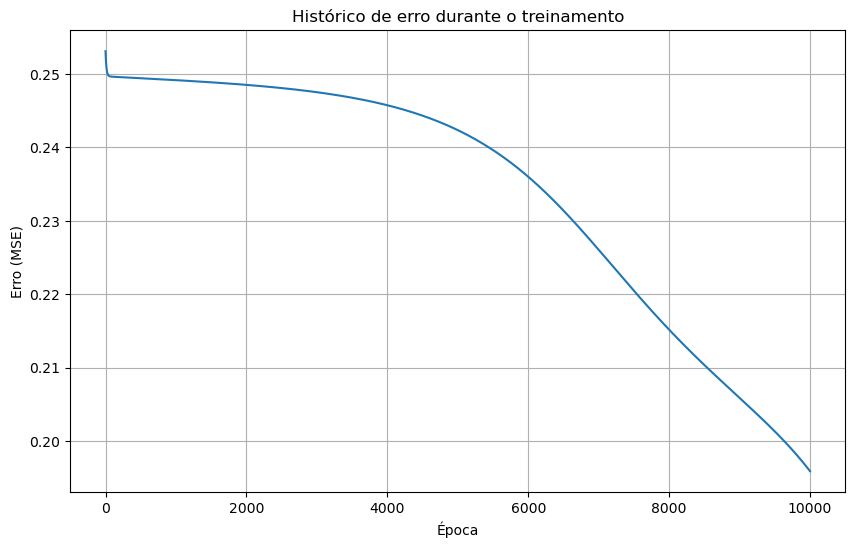

Treinamento pode não ter convergido com sucesso!
Erro final: 0.195917


In [15]:
main()

Iniciando o treinamento...
Época : 100: Erro = 0.309278 

 Treinamento concluído!
Error Final: 0.309278
(0, 0) -> 0 -> 0.7252
(0, 1) -> 1 -> 0.7442
(1, 0) -> 1 -> 0.7484
(1, 1) -> 0 -> 0.7631

Erro médio quadrático (MSE): 0.309278


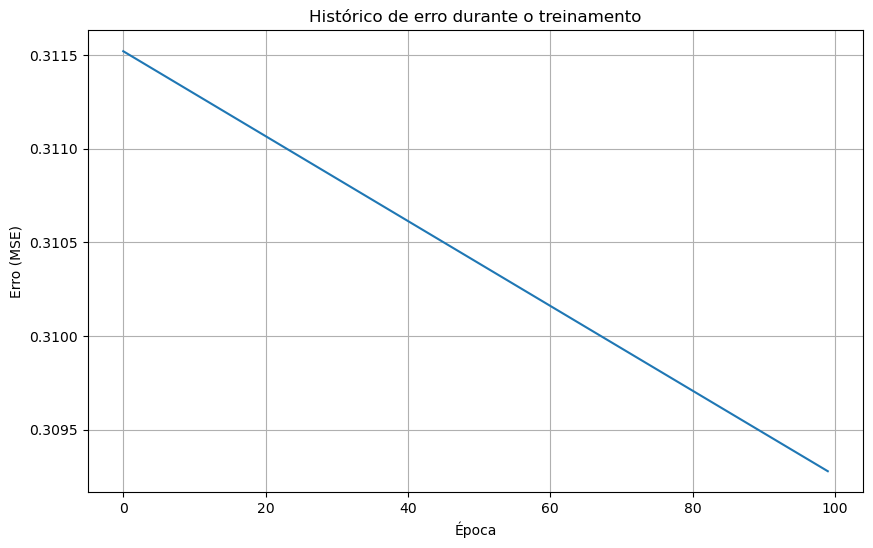

Treinamento pode não ter convergido com sucesso!
Erro final: 0.309278
Iniciando o treinamento...
Época : 100: Erro = 0.263586 

 Treinamento concluído!
Error Final: 0.263586
(0, 0) -> 0 -> 0.3878
(0, 1) -> 1 -> 0.3845
(1, 0) -> 1 -> 0.3846
(1, 1) -> 0 -> 0.3821

Erro médio quadrático (MSE): 0.263586


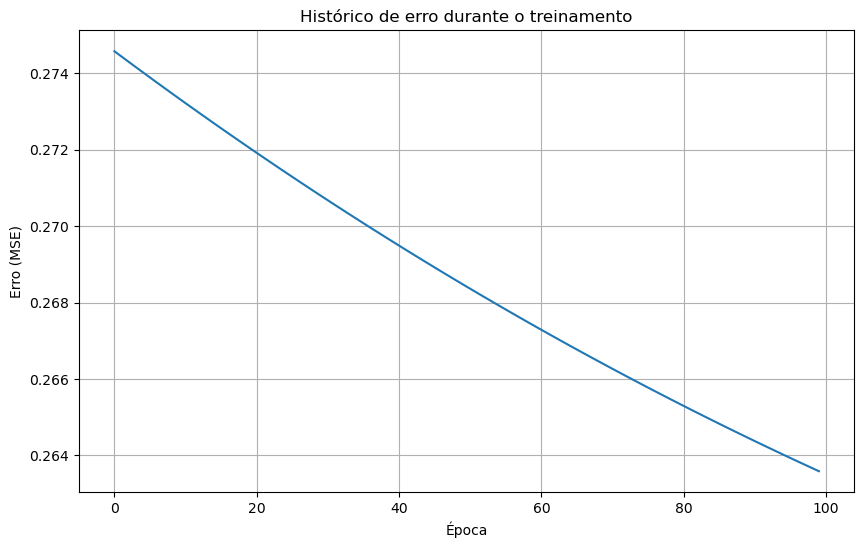

Treinamento pode não ter convergido com sucesso!
Erro final: 0.263586
Iniciando o treinamento...
Época : 100: Erro = 0.249468 

 Treinamento concluído!
Error Final: 0.249468
(0, 0) -> 0 -> 0.4846
(0, 1) -> 1 -> 0.4757
(1, 0) -> 1 -> 0.5254
(1, 1) -> 0 -> 0.5128

Erro médio quadrático (MSE): 0.249468


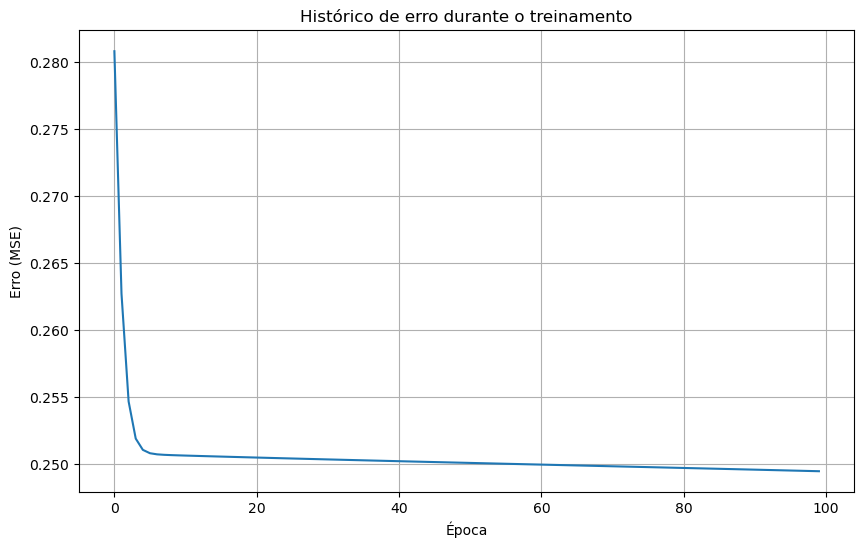

Treinamento pode não ter convergido com sucesso!
Erro final: 0.249468
Iniciando o treinamento...
Época : 100: Erro = 0.297095 
Época : 200: Erro = 0.295978 
Época : 300: Erro = 0.294869 
Época : 400: Erro = 0.293767 
Época : 500: Erro = 0.292673 
Época : 600: Erro = 0.291588 
Época : 700: Erro = 0.290512 
Época : 800: Erro = 0.289445 
Época : 900: Erro = 0.288388 
Época : 1000: Erro = 0.287341 

 Treinamento concluído!
Error Final: 0.287341
(0, 0) -> 0 -> 0.3040
(0, 1) -> 1 -> 0.3088
(1, 0) -> 1 -> 0.3053
(1, 1) -> 0 -> 0.3107

Erro médio quadrático (MSE): 0.287341


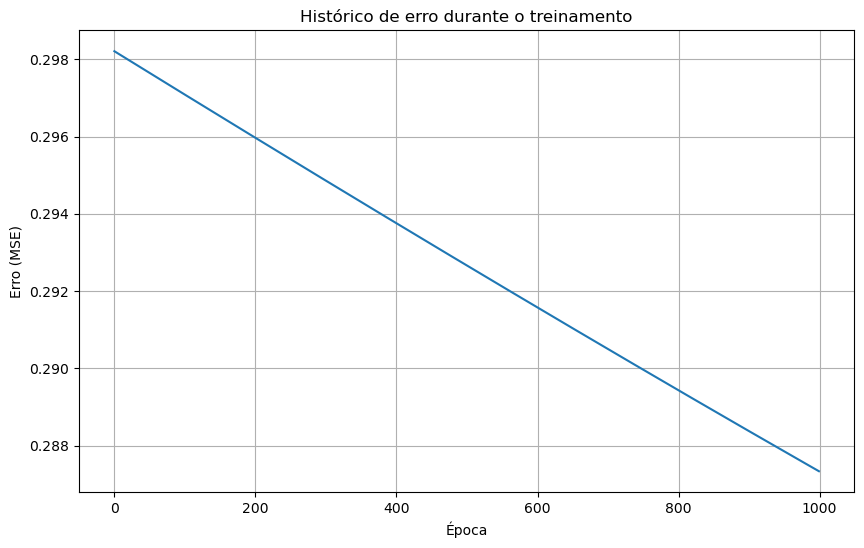

Treinamento pode não ter convergido com sucesso!
Erro final: 0.287341
Iniciando o treinamento...
Época : 100: Erro = 0.264620 
Época : 200: Erro = 0.255699 
Época : 300: Erro = 0.252008 
Época : 400: Erro = 0.250652 
Época : 500: Erro = 0.250181 
Época : 600: Erro = 0.250021 
Época : 700: Erro = 0.249965 
Época : 800: Erro = 0.249944 
Época : 900: Erro = 0.249934 
Época : 1000: Erro = 0.249929 

 Treinamento concluído!
Error Final: 0.249929
(0, 0) -> 0 -> 0.5044
(0, 1) -> 1 -> 0.5130
(1, 0) -> 1 -> 0.4863
(1, 1) -> 0 -> 0.4943

Erro médio quadrático (MSE): 0.249929


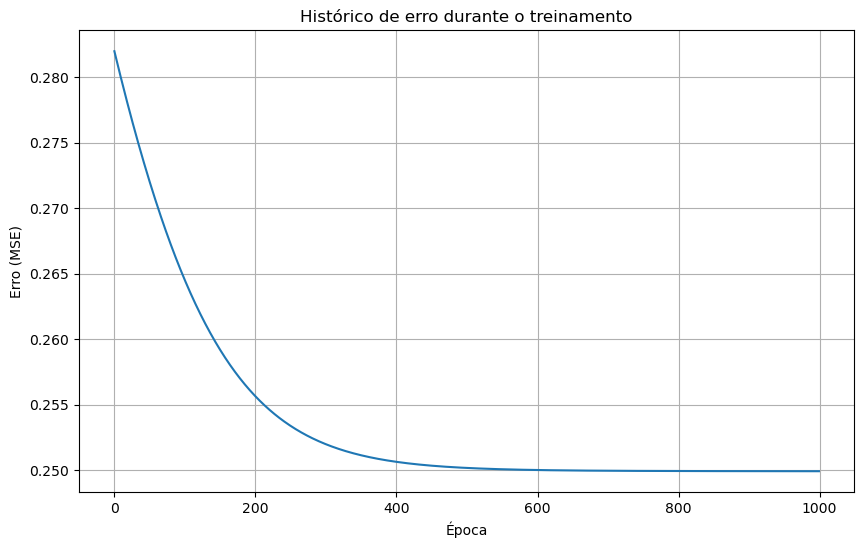

Treinamento pode não ter convergido com sucesso!
Erro final: 0.249929
Iniciando o treinamento...
Época : 100: Erro = 0.249401 
Época : 200: Erro = 0.247486 
Época : 300: Erro = 0.243646 
Época : 400: Erro = 0.234344 
Época : 500: Erro = 0.212845 
Época : 600: Erro = 0.162402 
Época : 700: Erro = 0.043479 
Época : 800: Erro = 0.008932 
Época : 900: Erro = 0.003778 
Época : 1000: Erro = 0.002197 

 Treinamento concluído!
Error Final: 0.002197
(0, 0) -> 0 -> 0.0357
(0, 1) -> 1 -> 0.9536
(1, 0) -> 1 -> 0.9536
(1, 1) -> 0 -> 0.0563

Erro médio quadrático (MSE): 0.002197


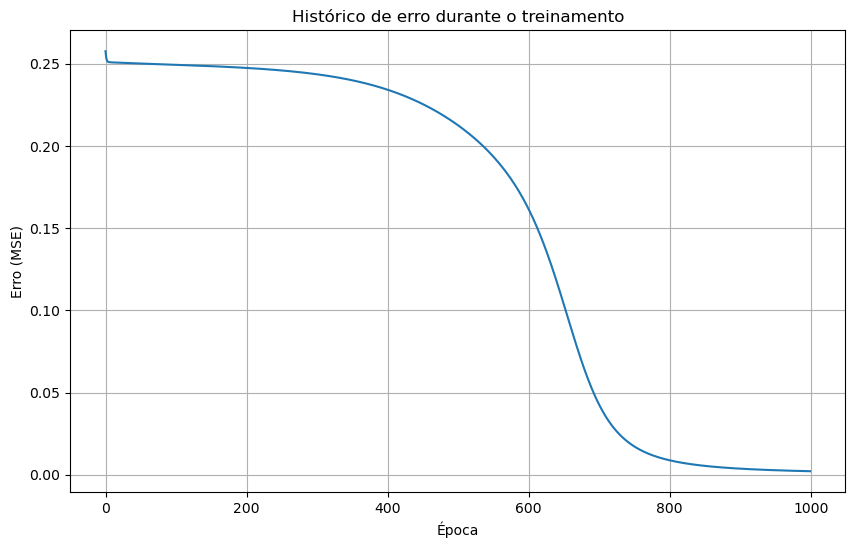

Treinamento concluído com sucesso!
Iniciando o treinamento...
Época : 100: Erro = 0.251990 
Época : 200: Erro = 0.251903 
Época : 300: Erro = 0.251819 
Época : 400: Erro = 0.251739 
Época : 500: Erro = 0.251662 
Época : 600: Erro = 0.251588 
Época : 700: Erro = 0.251518 
Época : 800: Erro = 0.251450 
Época : 900: Erro = 0.251386 
Época : 1000: Erro = 0.251324 
Época : 1100: Erro = 0.251265 
Época : 1200: Erro = 0.251208 
Época : 1300: Erro = 0.251154 
Época : 1400: Erro = 0.251102 
Época : 1500: Erro = 0.251052 
Época : 1600: Erro = 0.251005 
Época : 1700: Erro = 0.250959 
Época : 1800: Erro = 0.250916 
Época : 1900: Erro = 0.250874 
Época : 2000: Erro = 0.250834 
Época : 2100: Erro = 0.250796 
Época : 2200: Erro = 0.250760 
Época : 2300: Erro = 0.250725 
Época : 2400: Erro = 0.250691 
Época : 2500: Erro = 0.250659 
Época : 2600: Erro = 0.250629 
Época : 2700: Erro = 0.250599 
Época : 2800: Erro = 0.250571 
Época : 2900: Erro = 0.250545 
Época : 3000: Erro = 0.250519 
Época : 3100: Err

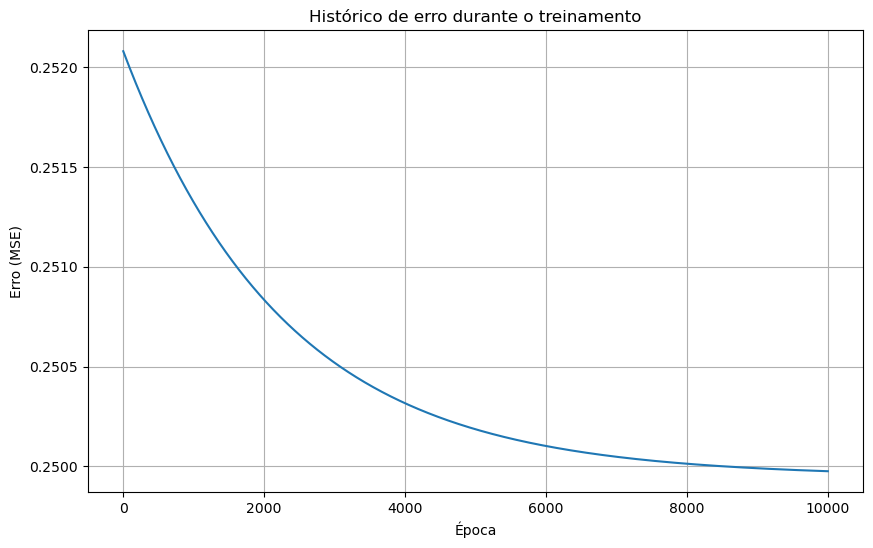

Treinamento pode não ter convergido com sucesso!
Erro final: 0.249975
Iniciando o treinamento...
Época : 100: Erro = 0.251158 
Época : 200: Erro = 0.250528 
Época : 300: Erro = 0.250306 
Época : 400: Erro = 0.250227 
Época : 500: Erro = 0.250198 
Época : 600: Erro = 0.250187 
Época : 700: Erro = 0.250182 
Época : 800: Erro = 0.250180 
Época : 900: Erro = 0.250178 
Época : 1000: Erro = 0.250177 
Época : 1100: Erro = 0.250176 
Época : 1200: Erro = 0.250175 
Época : 1300: Erro = 0.250174 
Época : 1400: Erro = 0.250173 
Época : 1500: Erro = 0.250172 
Época : 1600: Erro = 0.250171 
Época : 1700: Erro = 0.250170 
Época : 1800: Erro = 0.250169 
Época : 1900: Erro = 0.250168 
Época : 2000: Erro = 0.250167 
Época : 2100: Erro = 0.250166 
Época : 2200: Erro = 0.250165 
Época : 2300: Erro = 0.250164 
Época : 2400: Erro = 0.250163 
Época : 2500: Erro = 0.250162 
Época : 2600: Erro = 0.250161 
Época : 2700: Erro = 0.250160 
Época : 2800: Erro = 0.250159 
Época : 2900: Erro = 0.250158 
Época : 3000:

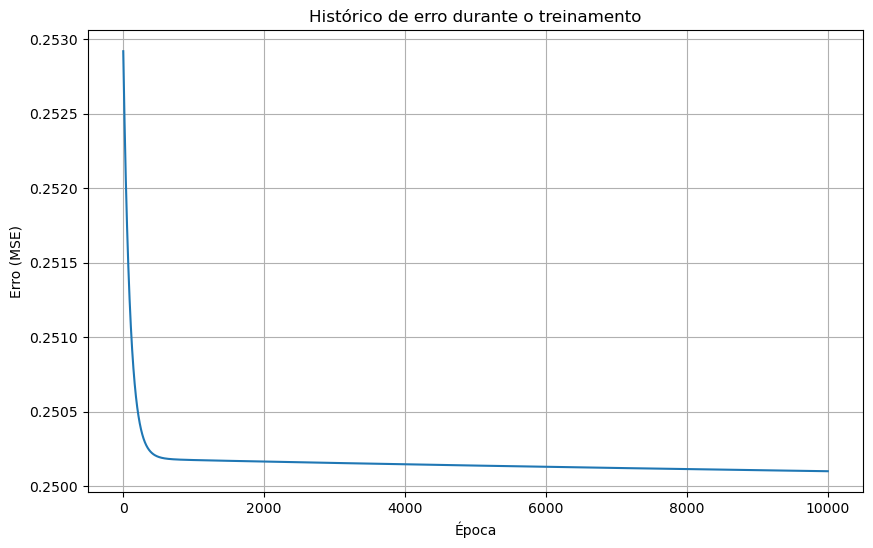

Treinamento pode não ter convergido com sucesso!
Erro final: 0.250102
Iniciando o treinamento...
Época : 100: Erro = 0.247205 
Época : 200: Erro = 0.243695 
Época : 300: Erro = 0.235717 
Época : 400: Erro = 0.218510 
Época : 500: Erro = 0.193198 
Época : 600: Erro = 0.146547 
Época : 700: Erro = 0.043518 
Época : 800: Erro = 0.011351 
Época : 900: Erro = 0.005054 
Época : 1000: Erro = 0.002965 
Época : 1100: Erro = 0.002008 
Época : 1200: Erro = 0.001482 
Época : 1300: Erro = 0.001157 
Época : 1400: Erro = 0.000939 
Época : 1500: Erro = 0.000784 
Época : 1600: Erro = 0.000669 
Época : 1700: Erro = 0.000581 
Época : 1800: Erro = 0.000512 
Época : 1900: Erro = 0.000456 
Época : 2000: Erro = 0.000411 
Época : 2100: Erro = 0.000373 
Época : 2200: Erro = 0.000341 
Época : 2300: Erro = 0.000313 
Época : 2400: Erro = 0.000289 
Época : 2500: Erro = 0.000269 
Época : 2600: Erro = 0.000251 
Época : 2700: Erro = 0.000235 
Época : 2800: Erro = 0.000220 
Época : 2900: Erro = 0.000208 
Época : 3000:

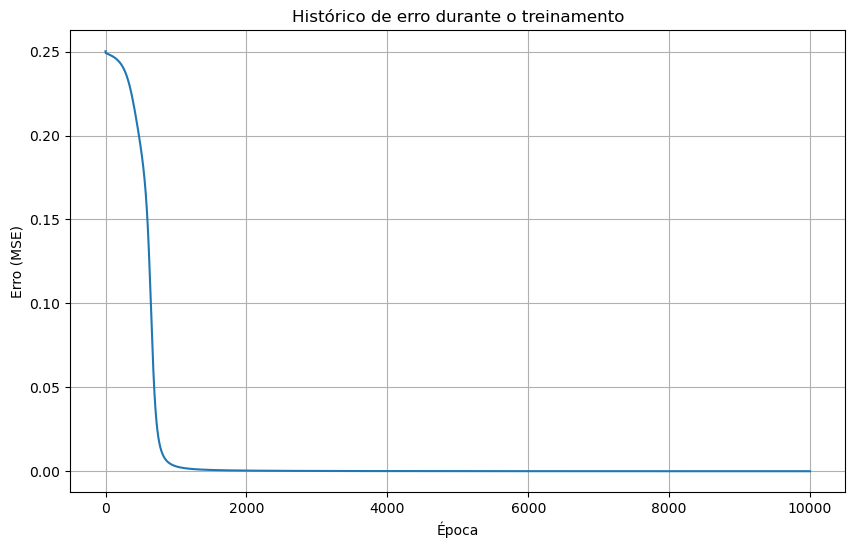

Treinamento concluído com sucesso!


In [16]:
X_xor = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]
])

y_xor = np.array([
        [0],
        [1],
        [1],
        [0]
])


epochs = [100, 1000, 10000]
lr = [0.001,0.01,1]

for e in epochs:
    for l in lr:

        mlp = MLP(learning_rate=l)
        mlp.train(X_xor,y_xor,e)

        predictions = mlp.predict(X_xor)

        for i in range(len(X_xor)):
                input_data = X_xor[i]
                expected = y_xor[i][0]
                predicted = predictions[i][0]

                print(f"({input_data[0]}, {input_data[1]}) -> {expected} -> {predicted:.4f}")
        
        print(f"\nErro médio quadrático (MSE): {mlp.erros[-1]:.6f}")

        plt.figure(figsize=(10,6))
        plt.plot(mlp.erros)
        plt.title("Histórico de erro durante o treinamento")
        plt.xlabel("Época")
        plt.ylabel("Erro (MSE)")
        plt.grid(True)
        plt.show()

        mse_threshold = 0.01

        if mlp.erros[-1] < mse_threshold:
                print("Treinamento concluído com sucesso!")
        else:
                print("Treinamento pode não ter convergido com sucesso!")
                print(f"Erro final: {mlp.erros[-1]:.6f}")
